# 11. Interest Rate Swaps

In [2]:
from fixedincome2025 import table

## Overview

* Interest rate swap is by far the most liquid OTC product
* In this chapter we introduce the standard SOFR swap and its pricing

## Standard SOFR Swap

* In a SOFR swap, two parties aggree on a term and a notional principal, say the term is 10y and the notional principal is 100 million
* Party A agrees to pay party B a yearly interest determined by a fixed coupon rate, say $3.65\%$, on the the notional principal agreed upon at the end of every year for the following 10 years
* In return, party B aggrees to pay party A a yearly interest determined by the 1y SOFR term rate: 
$$
\text{SOFR Term Rate} = \frac{1}{\tau}\left(\prod_j (1+\Delta t_j r_j) - 1\right), 
$$
with $\tau = 1$ for 1y. The payment is also made at the end of every year for the following 10 years
* There is no principal payment on either side, that's why it's called the *notional* principal: No one has ever seen that 100 million
* There is no initial payment on either side, but the fixed rates are quoted in the market for all terms up to 30 years

## Standard SOFR Swap: Terminologies

* Fixed Rate: The fixing coupon rate, $3.65\%$ in the previous examle
* Floating Rate: Yearly SOFR term rate in the previous examle
* Fixed Leg: All fixed coupon payments (cash flows)
* Floating Leg: All floating coupon payments (cash flows)
* Swap Legs: Fixed leg and floating leg
* Payer Swap: If you are the party who pays fixed coupons, you say you have a payer swap
* Receiver Swap: If you are the party who receives floating coupons, you have a receiver swap
* Swap Rate: The fixed rate is called the swap rate of the term. For example $3.65\%$ would be the 10y swap rate in the previous example

## Yield Curve's 6 Representations With SOFR Extension

* Given the backward looking nature of the SOFR term rate, a forward contract for the period $[T, T+\tau]$ can trade in the period $[T, T+\tau]$
    * This wasn't possible in the LIBOR world where the forward contract has the underlying forward rate fixed at $T$
* Now we need to model $L(t, T, T+\tau)$ for $t\in [T, T+\tau]$

* But recall that $L(t, T, T+\tau)$ is implied by
\begin{align*}
\frac{1}{1+\tau L(t, T, T+\tau)} = p(t, T, T+\tau) = \frac{P(t, T+\tau)}{P(t, T)}
\end{align*}
* Plugging in a $t$ that's greater than $T$ breaks the definition:
    * What's the meaning of $P(t, T)$ when $t>T$?

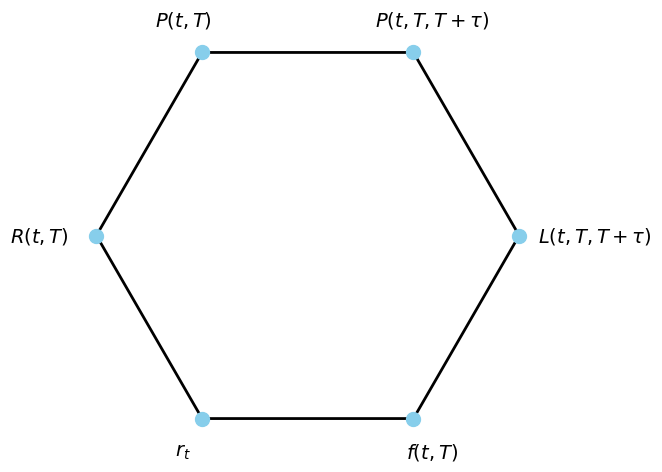

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hexagon vertices (clockwise, starting from top left)
labels = [
    r"$P(t, T)$",
    r"$R(t, T)$", 
    r"$r_t$", 
    r"$f(t, T)$",
    r"$L(t, T, T+\tau)$",
    r"$P(t, T, T+\tau)$",
    ]

# Calculate hexagon coordinates
angles = np.linspace(np.pi/2 + np.pi/6, np.pi/2 + np.pi/6 + 2*np.pi, 7)  # 6 vertices + close the shape
radius = 1
x = radius * np.cos(angles)
y = radius * np.sin(angles)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, 'k-', lw=2)
ax.scatter(x[:-1], y[:-1], s=100, color='skyblue', zorder=5)

# Annotate each vertex with custom offset for the long label
for i, label in enumerate(labels):
    # Default offset
    dx = 0.18 * np.cos(angles[i])
    dy = 0.18 * np.sin(angles[i])
    # Increase offset for the long label 'L(t, T, T+tau)'
    if label == r"$L(t, T, T+\tau)$":
        dx *= 2
        dy *= 2
    elif label == "$R(t, T)$":
        dx *= 1.5
        dy *= 1.5
    ax.text(x[i]+dx, y[i]+dy, label, fontsize=14, ha='center', va='center')

ax.set_aspect('equal')
ax.axis('off')
# plt.title('Six Yield Curve Notations (Clockwise)', fontsize=16)
plt.show()

## The 6 Representations of Yield Curve: Review


<!-- 
| Notation                  | Definition                    |
|---------------------------|-------------------------------|
| $P(t, T)$                 | Price of a zero-coupon bond that pays $\$1$ and maturity $T$, observed at $t$ |
| $P(t, T, T+\tau)$         | Price of the forward bond that pays $\$1$ for the future period $[T, T+\tau]$, observed at $t$ |
| $L(t, T, T+\tau)$         | Forward (term) rate for the future period $[T, T+\tau]$ observed at $t$ |
| $f(t, T)$                 | Time-$T$ instantaneous forward rate observed at $t$ |
| $r_t$                     | Short rate                    |
| $R(t, T)$                 | Zero rate (spot rate)         |   
-->


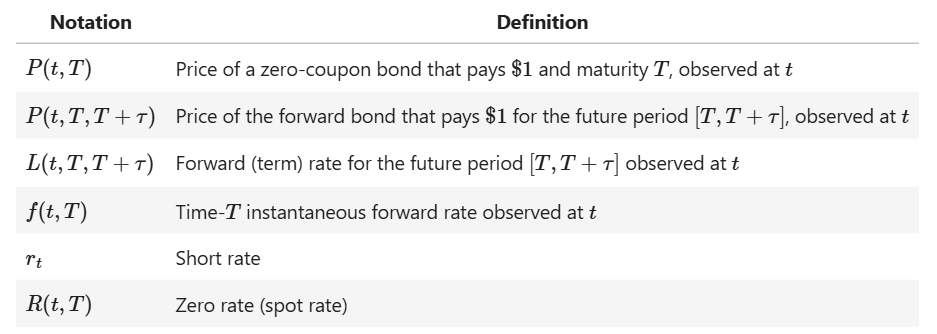

## Money Market Account (MMA)

* If you put $\$1$ into an MMA at time zero, the time-$t$ value of the account is
\begin{align*}
M_t = e^{\int_0^t r_s\,ds}, 
\end{align*}
where $r_t$ is the short rate process
* You can think of $r_t$ as the daily SOFR fixings
* In an MMA you are simply lending out the cash nightly and keep rolling

## Extended ZCB Price

* For $t>T$, define
\begin{align*}
P(t, T) = \frac{M_t}{M_T} = e^{\int_T^t r_s\,ds}
\end{align*}
* This means, right after the maturity of the ZCB, you put the $\$1$ cash into an MMA

## Extended Forward Rate

* The forward term rate: 
\begin{align*}
L(t, T, T+\tau) = \frac{1}{\tau} \left(\frac{P(t, T)}{P(t, T+\tau)} - 1\right)
\end{align*}
* When $t\in[T, T+\tau)$, the numerator $P(t, T) = e^{\int_T^t r_s\,ds}$ is known but the denominator $P(t, T+\tau)$ is still unknown so $L(t, T, T+\tau)$ is not fixed
    * While the denominator $P(t, T+\tau)$ is unknown, it's less and less volatile when $t$ gets closer and closer to $T+\tau$, consistent with our previous observation that the forward term rate is less and less volatile in the reference period
    * This is different from the LIBOR world where $L(t, T, T+\tau)$ is fixed at $t=T$
* At $t = T+\tau$, both numerator and denominator are known so $L(t, T, T+\tau)$ is fixed

## Forward Rate Fixing

* At $t \ge T+\tau$, the forward rate is fixed to be
\begin{align*}
L(t, T, T+\tau) &= \frac{1}{\tau} \left(\frac{P(t, T)}{P(t, T+\tau)} - 1\right)\\
&= \frac{1}{\tau} \left(\frac{M_t/M_T}{M_t/M_{T+\tau}} - 1\right)\\
&= \frac{1}{\tau} \left(e^{\int_T^{T+\tau} r_s\,ds} - 1\right)\\
&\approx \frac{1}{\tau} \left(e^{\sum_j r_{t_j}\Delta t_j} - 1\right)\\
&= \frac{1}{\tau} \left(\prod_j e^{r_{t_j}\Delta t_j} - 1\right)\\
&\approx \frac{1}{\tau} \left(\prod_j (1 + r_{t_j}\Delta t_j) - 1\right), 
\end{align*}
which is the definition of the SOFR term rate

## Extended Instantaneous Forward Rate

* For $t>T$, the instantaneous forward rate is 
\begin{align*}
f(t, T) &= -\frac{\partial}{\partial T} \log P(t, T)\\
&= -\frac{\partial}{\partial T} \int_T^t r_s\,ds = r_T, 
\end{align*}
which is the daily SOFR fixing at $T$

## Standard SOFR Swap Pricing

$$
$$

\begin{align*}
\text{Swap PV} &= \text{Floating Leg PV} + \text{Fixed Leg PV}\\
&= \sum_j(\text{PV of the $j$-th Floating Coupon Payment}) + \sum_j(\text{PV of the $j$-th Fixed Coupon Payment})
\end{align*}

## PV of a Future Fixed Coupon Payment

* Assuming the fixed rate is $K$, the time-$t$ PV of a future cash flow $\tau K$, received at time $T+\tau$, is
$$
\tau P(t, T+\tau)K, 
$$
which is simply the discounted future cash flow

## PV of a Future Floating Coupon Payment

* PV of a future cash flow  $\tau L(T+\tau, T, T+\tau)$, received at time $T+\tau$, can be derived from a no-arbitrage argument
* If you buy $T$-ZCB and short sell $(T+\tau)$-ZCB at $t$: 
    * Your cost (net cash flow) at $t$ is $P(t, T+\tau) - P(t, T)$
    * You are guaranteed to receive $\$1$ at $T$ and you are obligated to pay $\$1$ at $T+\tau$
    * When you receive $\$1$ at $T$, lend it out in the repo market nightly, rolling the lending to a perid of $\tau$ years
    * By $T+\tau$ you will have $1+\tau L(T+\tau, T, T+\tau)$
    * But you are obligated to pay $\$1$ at $T+\tau$, so you are left with a net cash flow of $\tau L(T+\tau, T, T+\tau)$
* In summary, $P(t, T+\tau) - P(t, T)$ is the cost at time $t$ to set up a risk-free portfolio in order to receive a future cash flow of $\tau L(T+\tau, T, T+\tau)$ at time $T+\tau$
* That means the time-$t$ PV of a future cash flow  $\tau L(T+\tau, T, T+\tau)$ received at time $T+\tau$ is $P(t, T) - P(t, T+\tau)$

## PV of a Future Floating Coupon Payment (Cont.)

* The time-$t$ PV of a future cash flow $\tau L(T+\tau, T, T+\tau)$ received at time $T+\tau$ is
\begin{align*}
P(t, T) - P(t, T+\tau) &= P(t, T+\tau)\left(\frac{P(t, T)}{P(t, T+\tau)} - 1\right)\\
&= P(t, T+\tau)\left(\frac{1}{P(t, T, T+\tau)}-1\right)\\
&= P(t, T+\tau)\left((1+\tau L(t, T, T+\tau))-1\right)\\
&= \tau P(t, T+\tau) L(t, T, T+\tau)
\end{align*}
* Compare this to the time-$t$ PV of a future fixed coupon payment: $\tau P(t, T+\tau)K$

* Which one is more risky? 

* When rates move, since the bond price $P$ and forward rate $L$ move in different directions, the change in $\tau P(t, T+\tau) L(t, T, T+\tau)$ can be smaller than $\tau P(t, T+\tau)K$

* This observation leads to a conclusion that's maybe somewhat counterintuitive to beginners: Fixed legs can be more risky than floating legs

## Dollar Durations

* Recall that, since dollar duration times yield change approximately equals negative bond price change, an asset with large dollar duration is more risky
* If you have a position with $\text{PV} =\tau K P(t, T+\tau)$, its dollar duration (term $\times$ bond price) is
$$
D^{\$}_{\text{fixed}} = \tau K(T+\tau-t)P(t, T+\tau)
$$
* Dollar duration of a floating coupon payment is hard to compute from the formula
$$
\tau P(t, T+\tau)L(t, T, T+\tau)
$$
* We look at the alternative form $P(t, T) - P(t, T+\tau)$. Its dollar duration is 
\begin{align*}
D^{\$}_{\text{floating}} &= (T+\tau-t) P(t, T+\tau) - (T-t)P(t, T)\\
\end{align*}

\begin{align*}
D^{\$}_{\text{floating}} &= (T+\tau-t) e^{-R(t, T+\tau)(T+\tau-t)} - (T-t)e^{-R(t, T)(T-t)}\\
&\approx (T+\tau-t) [1-R(t, T+\tau)(T+\tau-t)] - (T-t)[1-R(t, T)(T-t)]\\
&= \tau +R(t, T)(T-t)^2 - R(t, T+\tau)(T+\tau-t)^2
\end{align*}

## Tenor Structure of a Swap

* Define a tenor structure of a swap $T_0 < T_1 < T_2 < \cdots < T_N$
    * At $T_0$, both parties enter into the swap with payment dates $T_1, T_2, \ldots, T_N$
* Define $\tau_n = T_{n+1} - T_n$ for $n=0, 1, \ldots, N-1$
* In a standard SOFR swap, $\tau_n$ is always 1y, and $T_n$ is the end of the $n$-th year

## Swap Rate

* The time-$T_0$ PV of an $N$-year-long (spot starting) payer swap with fixed rate $K$ is
\begin{align*}
\sum_{n=0}^{N-1}\left(\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1}) - \tau_n P(T_0, T_{n+1})K\right)
\end{align*}
* As there is no initial payment, this PV is set to zero to find the swap rate $K^*$:
\begin{align*}
0 &= \sum_{n=0}^{N-1}\left(\tau_n P(T_0, T_{n+1})L(t, T_n, T_{n+1}) - \tau_n P(T_0, T_{n+1})K^*\right)\\
  &= \left[\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1})\right] - K^*\left[\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})\right], 
\end{align*}
so 
\begin{align*}
K^* = \frac{\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1})}{\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})}
\end{align*}
* This is the $N$-year swap rate quoted in the market

## Swap Rate (Cont.)

\begin{align*}
K^* = \frac{\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1})}{\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})}
\end{align*}
* A weighted average of the forward term rates, with the discount factors being the weights 
    * The closer the reference period $[T_n, T_{n+1}]$ is, the more heavily weighted the corresponding forward rate
* The swap rate is uniquely determined by the current yield curve. Any quotes different from $K^*$ will lead to arbitrage

## Swap Rate: Exercise I

* If today's SOFR yield curve is as below, what's the 3Y swap rate? 

In [6]:
table('yc_10092025').T

,1m,1.5m,2m,3m,4m,6m,1y,2y,3y,5y,7y,10y,20y,30y
Yield,4.2%,4.17%,4.11%,4.03%,3.95%,3.83%,3.66%,3.6%,3.59%,3.74%,3.92%,4.14%,4.7%,4.72%


## Swap Curve

* The swap rate depends on the tenor structure (depends on $N$)
* For each term $N=1, 2, 3, \ldots, 30,$ we can compute a different swap rate $K^*$, which form the swap curve

## Forward Swap Rate

* In general, the time-$t$ PV of an $N$-year-long forward starting payer swap with fixed rate $K$ is
\begin{align*}
\sum_{n=0}^{N-1}\left(\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1}) - \tau_n P(t, T_{n+1})K\right)
\end{align*}
* Following the same derivation as we've done previously, we obtain the formula for a forward swap rate, which we denote by $S(t)$ hereafter
\begin{align*}
S(t) = \frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})}{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})}
\end{align*}
* The spot swap rate is $S(T_0)$
* $S(t)$ is a weighted average of forward rates, both the weights and the forward rates are random, and they are related in a complex way
* The forward swap rate is uniquely determined by the current yield curve, same as the spot swap rate, and the forward term rate $L(t, T, T+\tau)$

## Annuity

* Define the annuity process as the denominator of $S(t)$: 
\begin{align*}
A(t) = \sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})
\end{align*}
* This is the time-$t$ PV of a financial product that promises to pay $\$1$ at the end of every year (at times $T_1, T_2, \ldots, T_N$), hence the name

## Forward Starting Swap PV Clean Form

* The time-$t$ PV of an $N$-year-long forward starting payer swap with fixed rate $K$ can be written as
\begin{align*}
&\sum_{n=0}^{N-1}\left(\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1}) - \tau_n P(t, T_{n+1})K\right)\\
=& \left[\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})\right] - K\left[\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})\right] \\
=& \left(\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})\right)\left(\frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})}{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})} - K\right) \\\\
=& A(t)(S(t) - K)
\end{align*}

## Swap PV01

* [Previously](https://fixedincome2025.readthedocs.io/en/latest/04_duration.html#DV01) we have mentioned PV01, the present value of 1bp, which is the PV change with 1 bp rates change
* To compute PV01 of a swap first write down its PV: 
    * The time-$t$ PV of an forward starting payer swap with fixed rate $K$ is $A(t)(S(t) - K)$
    * Plug in $t=T_0$ to obtain the spot starting swap PV $A(T_0)(S(T_0) - K)$
    * But market will quote $K=S(T_0)$ so that no cash flows happen initially
    * Initially, the PV is $A(T_0)(S(T_0) - K) = 0$
* Imagine you have bought a swap at $T_0$ with zero PV initially. After a tiny $\Delta t$, if the swap rate is up 1bp, the PV becomes
$$
A(T_0 + \Delta t)\underbrace{(S(T_0  + \Delta t) - K)}_{\approx 1 \text{ bp}} \approx A(T_0)\times 0.0001
$$
* Thus PV01 of a swap is approximately its corresponding annuity $A(T_0)$ times 1 bp

## Swap PV01: A Closer Look

* You bought a swap with zero PV initially, and after a tiny $\Delta t$, the swap rate is up 1bp
* But swap rate is 
$$
S(t) = \frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})}{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})}
$$
* If all forward rates $L(t, T_n, T_{n+1})$ are up 1 bp, the swap rate will be up *approximately* 1 bp
    * "Approximately" because when forward rates change, ZCBs $P(t, T_n)$ also change
    * So we are saying a parallel *forward* curve shift of 1 bp will lead to 1 bp shift in swap rate
    * [Previously](https://fixedincome2025.readthedocs.io/en/latest/04_duration.html#DV01) we define PV01 to be PV change corresponding to parallel *zero* curve shift of 1 bp, not exactly the same
    * There is not a rigorous definition of PV01, as in what rates are up by 1bp? Because there is no need. For one thing, the curve never really moves parallelly
* Despite all that, $A(T_0)\times 0.0001$ is usually a good approximation of swap PV01 in practice

## Swap Rate Alternative Formula

$$
$$

$$
S(t) = \frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})}{A(t)}, \qquad A(t) = \sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})
$$
* In the formula we can replace $L(t, T_n, T_{n+1})$ by 
\begin{align*}
L(t, T_n, T_{n+1}) = \frac{1}{\tau_n} \left(\frac{P(t, T_n)}{P(t, T_{n+1})} - 1\right)
\end{align*}
and write
\begin{align*}
S(t) &= \frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})\left[\frac{1}{\tau_n} \left(\frac{P(t, T_n)}{P(t, T_{n+1})} - 1\right)\right]}{A(t)}\\
&= \frac{\sum_{n=0}^{N-1}\left(P(t, T_0) - P(t, T_{n+1})\right)}{A(t)}\\
&= \frac{P(t, T_0) - P(t, T_{N})}{A(t)}
\end{align*}

## Swap Rate Alternative Formula (Cont.)

* The numerator simplifies to 
$$
\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1}) = P(t, T_0) - P(t, T_{N})
$$
* Previously in computing PV of a future floating coupon payment, we have seen a special case of this with $N=1$

## Swap Rate Alternative Formula (Cont..)

* We have
\begin{align*}
A(t) &= \sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})\\
S(t) &= \frac{\sum_{n=0}^{N-1}\tau_n P(t, T_{n+1})L(t, T_n, T_{n+1})}{A(t)}\\
&= \frac{P(t, T_0) - P(t, T_N)}{A(t)}
\end{align*}
* In particular, we have the spot swap rate
\begin{align*}
S(T_0) = \frac{1 - P(T_0, T_{N})}{A(T_0)}
\end{align*}

## Swap Rate: Exercise II

* Given a SOFR yield curve as below, what's the 3Y swap rate? 

In [5]:
table('yc_10022025').T

,1 Mo,1.5 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
10/2/2025,4.23%,4.18%,4.11%,4.02%,3.96%,3.81%,3.62%,3.55%,3.56%,3.67%,3.86%,4.10%,4.66%,4.69%


## No Arbitrage Argument

* Below is a no arbitrage argument of the identity
$$
\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1}) = 1 - P(t, T_{N})
$$
* If you short sell an $N$-year ZCB with notional $\$1$, and you lend out $\$1$ today, your net cash flow today is the negative right-hand side $P(t, T_{N}) - 1$

## No Arbitrage Argument (Cont.)

$$
$$
$$
\sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1}) = 1 - P(t, T_{N})
$$
* If you lend out $\$1$ at floating rate for a year, at the end of the first year you receive $1+\tau_0 L(T_1, T_0, T_1)$. You keep the interest $\tau_0 L(T_1, T_0, T_1)$ and lend out the principal $\$1$ again at floating rate for the second year
* At the end of the second year you receive $1+\tau_1 L(T_2, T_1, T_2)$. You keep the interest $\tau_1 L(T_2, T_1, T_2)$ and lend out the principal $\$1$ again at floating rate for the third year
* If you keep doing this for $N$ years, you get interest cash flows $\tau_n L(T_{n+1}, T_n, T_{n+1})$ at the end of the $(n+1)$-th year, for all $n=0, 1, \ldots, N-1$
* At the end of the $N$-th year, you keep the interest $\tau_{N-1} L(T_{N}, T_{N-1}, T_{N})$ and use the $\$1$ to clear the ZCB you sold at the beginning
* But we have established that, the time-$T_0$ PV of $\tau_n L(T_{n+1}, T_n, T_{n+1})$ is $\tau_n P(T_0, T_{n+1})L(T_0, T_n, T_{n+1})$
* Thus we must have PVs of all interest cash flows sum up (left-hand side) to be the initial cost setting up this strategy (right-hand side)

## Synthetic Fixed-Rate Bond

* Swaps provide a way to lock in the fixed rate for a series of periodical interest payment, like holding a fixed coupon bond
* If you have $\$1$ notional, this is how you can lock in the 5Y swap rate quoted in the market today, for the following 5 years: 
    * Run the "keep lending out $\$1$ to earn the interest at the end of every year" strategy to get a series of floating interest payments
    * Enter into a 5Y receiver swap to trade floating interest for fixed coupon interest payments

## Swap Spread

* But you could have just bought the 5Y Treasuries. What's the difference?
$$
\text{5Y Swap Spread} = \text{5Y Swap Rate} - \text{5Y Treasury Yield}
$$
* Swap spreads at different terms form a spread curve, mostly positive. Does that give you an arbitrage opportunity?

* No! As explained in the early chapters, Treasury yields are artificially low given tax benefit and regulatory requirements
* If you short sell a 5Y treasury note to finance a 5Y synthetic fixed-rate bond in the swap market, given the positive swap spread, you might think you can earn interests at a higher 5Y swap rate while paying treasury coupons at a lower rate, but because of income tax, you end up making very little, or lose money

## Constant Maturity Swap (CMS)

* Standard SOFR swaps are so liquid the swap rates itself is an index upon which people trade derivatives (CMS swaps, CMS options, etc.)
* Think of a fixed term, say 10y. We have $N=10$ and
\begin{align*}
A(T_0) = \sum_{n=0}^{N-1}\tau_n P(T_0, T_{n+1}), \qquad S(T_0) = \frac{1 - P(T_0, T_{N})}{A(T_0)}
\end{align*}
* Think of all $T_n$ some calendar dates, say $T_0$ is 11/19/2025, $T_1$ is 11/19/2026, etc.
* At EOD 11/19/2025, when we have a close curve, all ZCBs, and hence $S(T_0)$ are known and fixed
* The next day, we use the same formula but with $T_0$ being 11/20/2025, $T_1$ being 11/20/2026, etc.
* At EOD 11/20/2025, when we have a close curve, $S(T_0)$ is known and fixed to be a different number as 11/19's 10y swap rate close quote
* Thus we obtain a 10y swap rate every day, that's known as the 10y CMS rate
* Derivatives on 2y, 5y, 10y, and 30y CMS rates are more liquidly trading